<center>
   Go back to the [Index](https://github.com/kadrlica/skymap/tree/master/examples/README.md)
</center>

# Chapter 1: Skymap Base Class

In this chapter we introduce the `skymap.Skymap` base class and some of it's features.


In [1]:
# Basic notebook imports
%matplotlib inline

import matplotlib
import pylab as plt
import numpy as np
import healpy as hp

We start by importing several classes from the skymap module and setting a few constants that we will use in this example.

In [2]:
# Import skymap and some of it's basic map classes
import skymap

At it's core, skymap is just a wrapper around [`basemap`](http://matplotlib.org/basemap/). The core skymap class `skymap.Skymap` is just a subclass of `basemap.Basemap`. It keeps all the core functionality (and most of the quirks) of `basemap.Basemap`, but adds a few celestially oriented features.

Following the `basemap.Basemap` convention, the default projection for a `skymap.Skymap` is "Cylindrical Equidistant" ('cyl'), which you may commonly think of as Cartesian. Creating a basic map of the sky is as easy as creating a instance of the `skymap.Skymap` class. Once you have a `Skymap`, you can call any of the methods inherited from `basemap` API (see [here](https://matplotlib.org/basemap/api/basemap_api.html) for details).

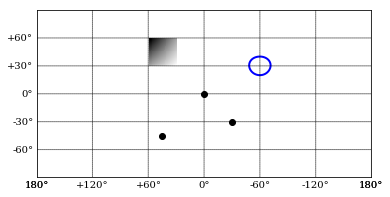

In [3]:
smap = skymap.Skymap()

def skymap_test(smap):
    """ Some simple test cases. """
    plt.gca()
    # Draw some scatter points
    smap.scatter([0,45,-30],[0,-45,-30],latlon=True)

    # Draw a tissot (projected circle)
    smap.tissot(-60,30,10,100,facecolor='none',edgecolor='b',lw=2)

    # Draw a color mesh image (careful, basemap is quirky)
    x = y = np.arange(30,60)
    xx,yy = np.meshgrid(x,y)
    z = xx*yy
    smap.pcolormesh(xx,yy,data=z,cmap='gray_r',latlon=True)
    
skymap_test(smap)

The example above is not very impressive in the 'cyl' projection, but the power of `basemap` means that you can "$\sim$seamlessly" switch between projections.

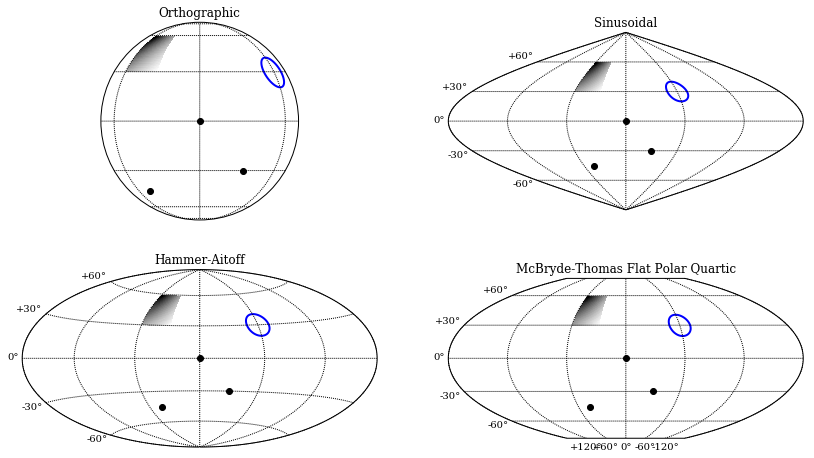

In [4]:
fig,axes = plt.subplots(2,2,figsize=(14,8))

# A nice projection for plotting the visible sky
plt.sca(axes[0,0])
smap = skymap.Skymap(projection='ortho',lon_0=0, lat_0=0)
skymap_test(smap)
plt.title('Orthographic')

# A common equal area all-sky projection
plt.sca(axes[1,0])
smap = skymap.Skymap(projection='hammer',lon_0=0, lat_0=0)
skymap_test(smap)
plt.title("Hammer-Aitoff")

# Something wacky that I've never used
plt.sca(axes[0,1])
smap = skymap.Skymap(projection='sinu',lon_0=0, lat_0=0)
skymap_test(smap)
plt.title("Sinusoidal")

# My favorite projection for DES
plt.sca(axes[1,1])
smap = skymap.Skymap(projection='mbtfpq',lon_0=0, lat_0=0)
skymap_test(smap)
plt.title("McBryde-Thomas Flat Polar Quartic")

If you are an experienced user of `basemap` you may have noticed a few features that differ in `skymap`. First, we are implicitly creating and labeling the parallels and meridians when we build the map (`basemap` requires you to explicitly call [`drawparallels`](https://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawparallels) and [`drawmeridians`](https://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap.drawmeridians)). Another is that we have set the map orientation to be in the "standard astronomical" convention with longitude increasing to the left.

<center>
   Go back to the [Index](https://github.com/kadrlica/skymap/tree/master/examples/README.md)
</center>